In [ ]:
%pip install langchain_openai langchain_core langgraph

In [5]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = []
messages.append(AIMessage("so you want to know why donald trump won the 2024 election?", name="Model"))
messages.append(HumanMessage("yes, that's correct", name="Lance"))
messages.append(AIMessage("great, are you looking for reasons from any particular perspective?", name="Model"))
messages.append(HumanMessage("from the perspective of a long time democratic operative", name="Lance"))

for m in messages:
    m.pretty_print()
    


================================== Ai Message ==================================
Name: Model

so you want to know why donald trump won the 2024 election?
================================ Human Message =================================
Name: Lance

yes, that's correct
================================== Ai Message ==================================
Name: Model

great, are you looking for reasons from any particular perspective?
================================ Human Message =================================
Name: Lance

from the perspective of a long time democratic operative


In [2]:
import os, getpass

def setenv(var:str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

setenv("OPENAI_API_KEY")

In [6]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
result = llm.invoke(messages)




In [8]:
result.pretty_print()

================================== Ai Message ==================================

As a long-time Democratic operative, analyzing why Donald Trump won the 2024 election would involve examining several key factors that may have contributed to his victory:

1. **Economic Factors**: If the economy was perceived as strong or improving under Republican leadership, voters might have felt more secure sticking with Trump, especially if they credited him with economic successes.

2. **Voter Turnout**: Understanding the turnout dynamics is crucial. If Democratic turnout was lower than expected, it could have been due to a lack of enthusiasm for the Democratic candidate, or effective voter suppression tactics in key states.

3. **Messaging and Campaign Strategy**: Trump’s campaign might have effectively tailored its message to resonate with swing voters or key demographic groups. This could include focusing on issues where Democrats were seen as weak or capitalizing on any missteps by the Democrat

In [27]:
def multiply(a: int, b: int):
    """Multiply a and b.

    Args:
        a : The first number.
        b : The second number.
    """
    return a * b

def get_background_info(topic: str):
    """Get background information on any topic related to the 2024 election.

    Args:
        topic: The topic to get background information on.
    """
    return f"""Here is some background information on {topic}.  
    The 2024 U.S. presidential election campaign between Vice President Kamala Harris and former President Donald Trump was a closely watched and highly contentious race. Here's a summary of key events and developments from November 2023 to the election outcome:
Campaign Dynamics
Harris entered the race in July 2024 after President Biden withdrew his candidacy11. She quickly gained momentum, posing a significant challenge to Trump's lead in national and swing state polls. Harris selected Minnesota Governor Tim Walz as her running mate, while Trump chose Ohio Senator JD Vance4.
Policy Platforms
Both candidates presented distinct visions for the country:
Harris' Platform:
Continued many of Biden's policies, including tax credits for middle-class families and lowering drug costs5
Proposed an "opportunity economy" focused on strengthening the middle class5
Supported national abortion protections, LGBT+ rights, and climate change legislation9
Advocated for a "populist" economic agenda, including bans on price gouging and expanding child tax credits9
Trump's Platform:
Campaigned on expanding executive authority and implementing "America First" policies2
Promised mass deportations and strict immigration policies6
Proposed tax cuts and economic measures aimed at his base2
Emphasized "retribution" against political opponents as a central theme2
Key Campaign Issues
Economy: Both candidates focused on economic policies, with Harris proposing measures to address rising costs and Trump emphasizing tax cuts52.
Immigration: Trump promised strict policies and mass deportations, while Harris supported increasing Border Patrol agents and reforming the system69.
Abortion: This remained a contentious issue, with Harris supporting national protections and Trump avoiding commitments to a federal ban4.
Foreign Policy: Harris supported continued aid to Ukraine and Israel but called for a ceasefire in Gaza, while Trump promoted an isolationist approach92.
Executive Power: Trump's campaign emphasized expanding presidential authority, which became a point of criticism from Harris2.
Debates and Public Appearances
A presidential debate between Harris and Trump was held on September 10, 2024, broadcast on ABC9. The vice presidential candidates, Walz and Vance, debated on October 1, 2024, on CBS9.
Election Outcome
On November 5, 2024, Donald Trump was declared the winner of the presidential election, securing a second term8. Vice President Harris conceded defeat and pledged to assist with a peaceful transfer of power8.
Post-Election
Following Trump's victory, there were calls from Senate Democrats for bipartisanship, while Republicans prepared to implement their agenda8. The election results sparked discussions about the future direction of both parties and the implications for American politics and policy.
This election was notable for its high stakes, the stark policy contrasts between candidates, and its potential to shape the future of American democracy and governance.
    """

llm_with_tools = llm.bind_tools([multiply, get_background_info])

In [28]:
tool_call = llm_with_tools.invoke(messages)

In [29]:
tool_call.pretty_print()


================================== Ai Message ==================================
Tool Calls:
  get_background_info (call_iZiGsUWKAgI10Mb1gzSpLgh2)
 Call ID: call_iZiGsUWKAgI10Mb1gzSpLgh2
  Args:
    topic: Donald Trump 2024 election victory analysis from a Democratic perspective


In [30]:
from typing_extensions import TypedDict
from typing import Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph import add_messages
from langgraph.graph import MessagesState
 
new_message = HumanMessage(content="get more info about trump and the election and then answer my question", name="Lance")

messages=add_messages(messages,new_message)

messages

# pprint(messages)


[AIMessage(content='so you want to know why donald trump won the 2024 election?', additional_kwargs={}, response_metadata={}, name='Model', id='a91a2641-b47a-4982-a305-67b63b7f7ba2'),
 HumanMessage(content="yes, that's correct", additional_kwargs={}, response_metadata={}, name='Lance', id='f2a84f15-3225-406a-bccb-8a0d8479b4f7'),
 AIMessage(content='great, are you looking for reasons from any particular perspective?', additional_kwargs={}, response_metadata={}, name='Model', id='116457a6-a10d-47b7-84d5-60df17054e48'),
 HumanMessage(content='from the perspective of a long time democratic operative', additional_kwargs={}, response_metadata={}, name='Lance', id='fbe1292c-ec2d-4f16-82c2-1d4fe328a579'),
 HumanMessage(content='get more info about trump and the election and then answer my question', additional_kwargs={}, response_metadata={}, name='Lance', id='9b43f7f8-43d7-4d3e-a314-2f05edb49ab1'),
 HumanMessage(content='get more info about trump and the election and then answer my question',

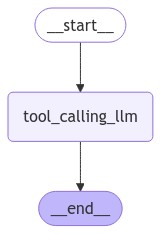

In [31]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [33]:
resp = graph.invoke({"messages": HumanMessage(content="i have a piece of land thats 150 meters long by 223 meters wide, whats the area?")})

for m in resp["messages"]:
    m.pretty_print()



================================ Human Message =================================

i have a piece of land thats 150 meters long by 223 meters wide, whats the area?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_CuPCd68RHwM8QA8Uof7jFYBP)
 Call ID: call_CuPCd68RHwM8QA8Uof7jFYBP
  Args:
    a: 150
    b: 223


In [34]:
llm_with_tools

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x000001E70DBCA810>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x000001E70DC5F190>, root_client=<openai.OpenAI object at 0x000001E70CB8ABD0>, root_async_client=<openai.AsyncOpenAI object at 0x000001E70DA84990>, model_name='gpt-4o', model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'multiply', 'description': 'Multiply a and b.', 'parameters': {'properties': {'a': {'description': 'The first number.', 'type': 'integer'}, 'b': {'description': 'The second number.', 'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'get_background_info', 'description': 'Get background information on any topic related to the 2024 election.', 'parameters': {'properties': {'topic': {'description': 'The topic to get background information on.', 'type': 'string'

In [35]:
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

sysmsg=SystemMessage(content="You are a helpful assistant that uses provided tools to answer user questions")

def assistant(state: MessagesState):
    return {"messages": [llm_with_tools.invoke([sysmsg] + state["messages"])]}

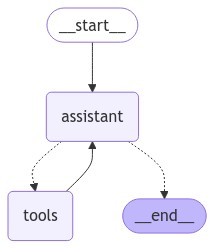

In [36]:
from langgraph.prebuilt import tools_condition, ToolNode

tools = [multiply, get_background_info]

builder2 = StateGraph(MessagesState)
builder2.add_node("assistant", assistant)
builder2.add_node("tools", ToolNode(tools))
builder2.add_edge(START, "assistant")   
builder2.add_conditional_edges("assistant", tools_condition)
builder2.add_edge("tools", "assistant")

react_graph = builder2.compile()

display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))


In [38]:
for m in react_graph.invoke({"messages": [HumanMessage(content="my land is 23m wide by 59m long, whats the area?")]})['messages']:
    pprint(m)

HumanMessage(content='my land is 23m wide by 59m long, whats the area?', additional_kwargs={}, response_metadata={}, id='2cde0c38-2353-41e5-801d-dcdee642c52f')
AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_WoqNpAXWG4EalVkRCfuMBC11', 'function': {'arguments': '{"a":23,"b":59}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 123, 'total_tokens': 140, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_45cf54deae', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c261e0dd-3de2-42e3-a9af-4f45df3d9665-0', tool_calls=[{'name': 'multiply', 'args': {'a': 23, 'b': 59}, 'id': 'call_WoqNpAXWG4EalVkRCfuMBC11', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1

In [ ]:
for m in react_graph.invoke({"messages": [HumanMessage(content="why did trump with the 2024 election?")]})['messages']:
    pprint(m)